In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from regions import Regions
import numpy as np
from astropy import units as u
from astropy.nddata import Cutout2D
import pandas as pd
import cv2
from split_image import split_image
import os
import random
from random import seed
import shutil
from skimage.io import imread,imshow
from skimage.transform import resize
from tqdm import tqdm
import tensorflow as tf
import tensorboard
from keras.models import Model, load_model
from keras.layers import concatenate, add
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Preparing images for the input layer

In [1]:
seed = 42

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = '../../../../../../Applications/PHYS499/dataset01v3/stage1_train/'

train_ids = next(os.walk(TRAIN_PATH))[1]

X_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,1),dtype=bool)


print('Resizing training images and masks')
for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/image/' + 'original_' +id_ +'.png')[:,:,:IMG_CHANNELS]
    img = resize(img,(IMG_HEIGHT,IMG_WIDTH), mode='constant',preserve_range=True)
    X_train[n] = img
    mask_ = imread(path + '/mask/' + 'original_' + id_ + '.png',as_gray=True)
    mask_ = np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH), mode='constant',preserve_range=True),axis=-1)
    Y_train[n] = mask_

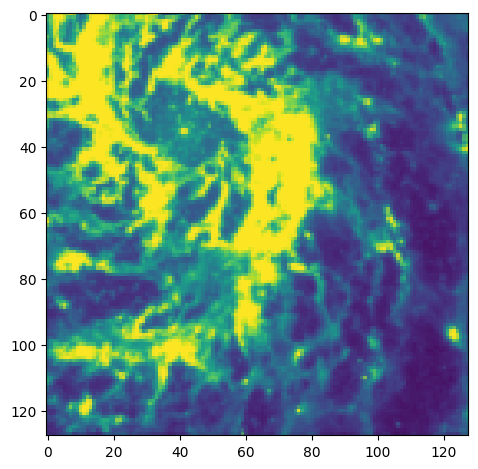

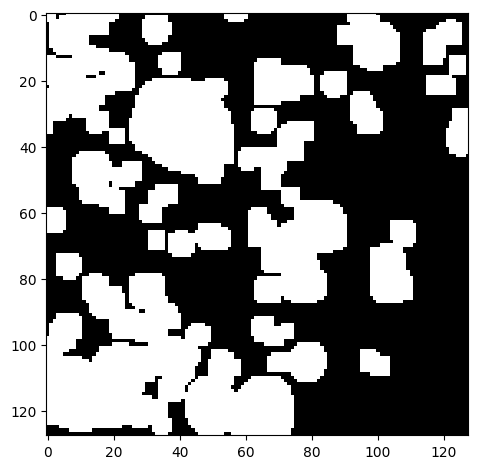

In [33]:
image_x = random.randint(0,len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

# Test from the given fits file

In [125]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TEST_PATH = '../../../../../../Applications/PHYS499/Testing/'

test_folder_ids = next(os.walk(TEST_PATH))[1]
for fit_folder in test_folder_ids:
    print('Resizing test images')
    original_path = TEST_PATH + fit_folder + '/original/'
    test_ids = next(os.walk(original_path))[2]
    
    X_test = np.zeros((len(test_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
    sizes_test = []
    for n,id_ in tqdm(enumerate(test_ids),total=len(test_ids)):
        path = original_path + id_
        img = imread(path)[:,:,:IMG_CHANNELS]
        sizes_test.append([img.shape[0],img.shape[1]])
        img = resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
        X_test[n] = img

    print('Prediction')
    preds_test = model.predict(X_test,verbose=1)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)

    parent_folder = TEST_PATH + fit_folder
    result_folder = f'{parent_folder}/result'
    os.mkdir(result_folder)

    for ix in tqdm(range(0,len(preds_test_t)),total=len(preds_test_t)):
        plt.title(test_ids[ix])
        imshow(X_test[ix])
        plt.contour(np.squeeze(preds_test_t[ix]))
        plt.gca().set_axis_off() # responsible for removing axes.
        plt.savefig(f'{result_folder}/{test_ids[ix]}',bbox_inches='tight',pad_inches = 0)
        plt.clf()

Resizing test images


100%|█████████████████████████████████████████| 131/131 [00:01<00:00, 95.25it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 83ms/step


100%|█████████████████████████████████████████| 131/131 [00:11<00:00, 11.45it/s]


Resizing test images


100%|█████████████████████████████████████████| 154/154 [00:01<00:00, 99.94it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 78ms/step


100%|█████████████████████████████████████████| 154/154 [00:15<00:00,  9.65it/s]


Resizing test images


100%|█████████████████████████████████████████| 157/157 [00:01<00:00, 98.56it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 82ms/step


100%|█████████████████████████████████████████| 157/157 [00:15<00:00, 10.16it/s]


Resizing test images


100%|█████████████████████████████████████████| 163/163 [00:01<00:00, 94.74it/s]

Prediction
1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 68ms/step


100%|█████████████████████████████████████████| 163/163 [00:15<00:00, 10.32it/s]


Resizing test images


100%|█████████████████████████████████████████| 155/155 [00:01<00:00, 92.98it/s]


Prediction
5/5 [==============================] - 0s 99ms/step


100%|█████████████████████████████████████████| 155/155 [00:14<00:00, 10.81it/s]


Resizing test images


100%|█████████████████████████████████████████| 158/158 [00:01<00:00, 90.52it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 72ms/step


100%|█████████████████████████████████████████| 158/158 [00:15<00:00, 10.34it/s]


Resizing test images


100%|███████████████████████████████████████████| 87/87 [00:00<00:00, 90.17it/s]

Prediction
1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 88ms/step


100%|███████████████████████████████████████████| 87/87 [00:09<00:00,  8.74it/s]


Resizing test images


100%|███████████████████████████████████████████| 80/80 [00:00<00:00, 87.91it/s]


Prediction
3/3 [==============================] - 0s 98ms/step


100%|███████████████████████████████████████████| 80/80 [00:09<00:00,  8.71it/s]


Resizing test images


100%|███████████████████████████████████████████| 55/55 [00:00<00:00, 92.33it/s]


Prediction
2/2 [==============================] - 0s 94ms/step


100%|███████████████████████████████████████████| 55/55 [00:05<00:00,  9.64it/s]


Resizing test images


100%|███████████████████████████████████████████| 96/96 [00:01<00:00, 89.39it/s]

Prediction
1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 70ms/step


100%|███████████████████████████████████████████| 96/96 [00:09<00:00, 10.28it/s]


Resizing test images


100%|███████████████████████████████████████████| 94/94 [00:01<00:00, 90.05it/s]

Prediction
1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 79ms/step


100%|███████████████████████████████████████████| 94/94 [00:09<00:00, 10.34it/s]


Resizing test images


100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 90.24it/s]


Prediction
5/5 [==============================] - 0s 76ms/step


100%|█████████████████████████████████████████| 146/146 [00:13<00:00, 10.56it/s]


Resizing test images


100%|█████████████████████████████████████████| 152/152 [00:01<00:00, 91.65it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 76ms/step


100%|█████████████████████████████████████████| 152/152 [00:16<00:00,  9.33it/s]


Resizing test images


100%|█████████████████████████████████████████| 140/140 [00:01<00:00, 87.28it/s]

Prediction
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 86ms/step


100%|█████████████████████████████████████████| 140/140 [00:12<00:00, 10.84it/s]


<Figure size 640x480 with 0 Axes>

# Removing the result folder from each fits folder

In [124]:
# for fit_folder in test_folder_ids:
#     parent_folder = TEST_PATH + fit_folder
#     result_folder = f'{parent_folder}/result'
#     if (os.path.exists(result_folder)):
#         shutil.rmtree(result_folder)